In [134]:
# imports necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit,cross_val_score,GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [135]:
# loads dataset
df = pd.read_csv("../data/challenge/train.csv")
df2 = pd.read_csv("../data/challenge/additive.csv")

#adds columns
df["cap"] = df2["CAPTC_DIA"]
df["resg"] = df2["RESG_DIA"]
df.drop(["Fluxo"],inplace=True,axis=1)



In [136]:
# df3 = pd.read_csv("../data/challenge/CBOEVolatilityIndexHistoricalData.csv",sep=";")

# date = {
#     "jan": "01",
#     "feb": "02",       
#     "mar": "03",
#     "apr": "04",
#     "may": "05",
#     "jun": "06",
#     "ju": "06",
#     "jul": "07",
#     "aug": "08",
#     "sep": "09",
#     "oct": "10",
#     "nov": "11",
#     "dec": "12",
# }
 
# df3["Date"] = df3["Date"].apply(lambda x : x.replace(x[0:4],date[x[0:3].lower()]+"/"))
# df3["Date"] = df3["Date"].apply(lambda x : x.replace(x[0:5],x[3:5]+"/"+x[0:2]))
# df3["Date"] =  pd.to_datetime(df3["Date"])
# df3 = df3[["Date","Price"]]
# df3 =df3.sort_values(by=['Date'])
# df["price"] = df3["Price"]

In [137]:
for coluna in ["Dol","IBOV","NDX","SPX"]:
    df[f"{coluna}_mean"] =df[coluna].shift(1)

for coluna in ["Dol_mean","IBOV_mean","NDX_mean","SPX_mean"]:
    df[coluna].iloc[0] =   df[coluna].iloc[1] 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6312\1514680364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna].iloc[0] =   df[coluna].iloc[1]


In [138]:
for coluna in ["Dol","IBOV","NDX","SPX"]:
    df[f"{coluna}_mean2"] =df[coluna].shift(2)

for coluna in ["Dol_mean2","IBOV_mean2","NDX_mean2","SPX_mean2"]:
    df[coluna].iloc[0] =   df[coluna].iloc[2] 
    df[coluna].iloc[1] =   df[coluna].iloc[2] 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6312\1491831544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna].iloc[0] =   df[coluna].iloc[2]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6312\1491831544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna].iloc[1] =   df[coluna].iloc[2]


In [139]:
df["NDX_SPX"] = df["NDX"]/df['SPX']
df["Dol_NDX"] = df["Dol"]/df["NDX"]
df["IBOV_NDX"] = df["IBOV"]/df["NDX"]
df["Dol_SPX"] = df["Dol"]/df["SPX"]

In [140]:
# df = df.merge(df3, left_on="DT_COMPTC",right_on="Date")
# df = df.drop(["Date"], axis=1)
df = df.drop(["DT_COMPTC"], axis=1)

In [141]:

# def lock_lim(df):
#     cols = df.columns
#     for col in cols:
#         q1 = np.percentile(df[col], 25)
#         q3 = np.percentile(df[col], 75)
#         iqr = q3 - q1
#         ls = q3 + 1.5*iqr
#         li = q1 - 1.5*iqr
#         df[col][df[col] < li] = li
#         df[col][df[col] > ls] = ls
    
#     return df

# print(df.describe())
# df = lock_lim(df)
# print(df.describe())

In [142]:
#características
X_train = df.drop(["cap","resg"],axis=1)[:2800]
X_test = df.drop(["cap","resg"],axis=1)[2800:]


#resposta
y_train = df[["cap"]][:2800]
y_test = df[["cap"]][2800:]

y_train2 = df[["resg"]][:2800]
y_test2 = df[["resg"]][2800:]

In [143]:
df

,IBOV,Dol,NDX,SPX,cap,resg,Dol_mean,IBOV_mean,NDX_mean,SPX_mean,Dol_mean2,IBOV_mean2,NDX_mean2,SPX_mean2,NDX_SPX,Dol_NDX,IBOV_NDX,Dol_SPX
0,25722.0,2.6759,1603.51,1202.08,21.124,0.502,2.6759,25722.0,1603.51,1202.08,2.6759,25722.0,1603.51,1202.08,1.333946,0.001669,16.041060,0.002226
1,24848.0,2.7190,1571.83,1188.05,9.247,5.470,2.6759,25722.0,1603.51,1202.08,2.6759,25722.0,1603.51,1202.08,1.323034,0.001730,15.808325,0.002289
2,24691.8,2.7140,1563.76,1183.74,8.484,5.792,2.7190,24848.0,1571.83,1188.05,2.6759,25722.0,1603.51,1202.08,1.321033,0.001736,15.790019,0.002293
3,24366.9,2.7218,1557.52,1187.89,21.616,7.088,2.7140,24691.8,1563.76,1183.74,2.7190,24848.0,1571.83,1188.05,1.311165,0.001748,15.644679,0.002291
4,24747.2,2.7120,1564.81,1186.19,5.981,8.309,2.7218,24366.9,1557.52,1187.89,2.7140,24691.8,1563.76,1183.74,1.319190,0.001733,15.814827,0.002286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116,120705.9,5.3087,13109.15,4112.50,1032.190,779.204,5.3070,119710.0,13001.63,4063.04,5.2213,122964.0,13351.27,4152.10,3.187635,0.000405,9.207759,0.001291
4117,121880.8,5.2728,13393.12,4173.85,1002.087,715.739,5.3087,120705.9,13109.15,4112.50,5.3070,119710.0,13001.63,4063.04,3.208817,0.000394,9.100254,0.001263
4118,122937.9,5.2751,13312.91,4163.29,887.584,1014.797,5.2728,121880.8,13393.12,4173.85,5.3087,120705.9,13109.15,4112.50,3.197690,0.000396,9.234487,0.001267
4119,122980.0,5.2613,13217.68,4127.83,981.088,603.063,5.2751,122937.9,13312.91,4163.29,5.2728,121880.8,13393.12,4173.85,3.202089,0.000398,9.304205,0.001275


In [144]:
# padroniza os dados
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)


In [145]:
tscv = TimeSeriesSplit()
# model = MLPRegressor(activation= "identity",
#  alpha= 0.001,
#  early_stopping= True,
#  hidden_layer_sizes= (50, 20),
#  shuffle= True,
#  solver= "lbfgs")

# model2 = MLPRegressor(activation= "identity",
#  alpha= 0.001,
#  early_stopping= True,
#  hidden_layer_sizes= (50, 20),
#  shuffle= True,
#  solver= "lbfgs")

#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ pegar aqui gridsearch
#feature tools: https://www.featuretools.com/
tscv = TimeSeriesSplit()
model = MLPRegressor(activation= "identity",
 alpha= 0.001,
 early_stopping= True,
 hidden_layer_sizes= (50, 20),
 shuffle= True,
 solver= "lbfgs")

model2 = MLPRegressor(activation= "identity",
 alpha= 0.001,
 early_stopping= True,
 hidden_layer_sizes= (50, 20),
 shuffle= True,
 solver= "lbfgs")


model.fit(X_train,y_train)
model2.fit(X_train,y_train2)


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

MLPRegressor(activation='identity', alpha=0.001, early_stopping=True,
             hidden_layer_sizes=(50, 20), solver='lbfgs')

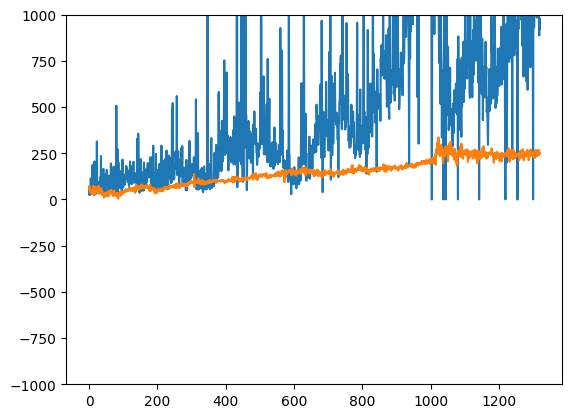

In [146]:
pred = model2.predict(X_test)
plt.ylim(top=2000)
plt.plot(np.arange(len(pred)),y_test)
plt.plot(np.arange(len(pred)),pred)
plt.ylim([-1000,1000])
plt.show()

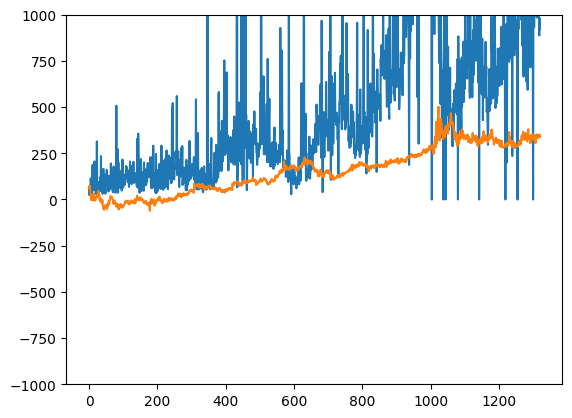

In [147]:
pred = model.predict(X_test)

plt.plot(np.arange(len(pred)),y_test)
plt.plot(np.arange(len(pred)),pred)
plt.ylim([-1000,1000])
plt.show()

In [148]:
model2.score(X_test,y_test2)

-0.015698053847753357

In [149]:
df3 = pd.read_csv("../data/challenge/test.csv")
# values = np.arange(3000,len(df["DT_COMPTC"]))
# for i in range(1,5):
#     coluna = df.columns[i]
#     plt.subplot(2,2,i)
#     plt.plot(df["DT_COMPTC"][values],df[coluna][values])
#     plt.plot(df3["DT_COMPTC"],df3[coluna])
#     plt.title(coluna)
# plt.show()

for coluna in ["Dol","IBOV","NDX","SPX"]:
    df3[f"{coluna}_mean"] =df3[coluna].shift(1)

for coluna in ["Dol_mean","IBOV_mean","NDX_mean","SPX_mean"]:
    df3[coluna].iloc[0] =   df3[coluna].iloc[1] 

for coluna in ["Dol","IBOV","NDX","SPX"]:
    df3[f"{coluna}_mean2"] =df3[coluna].shift(2)

for coluna in ["Dol_mean2","IBOV_mean2","NDX_mean2","SPX_mean2"]:
    df3[coluna].iloc[0] =   df3[coluna].iloc[2] 
    df3[coluna].iloc[1] =   df3[coluna].iloc[2] 

df3["NDX_SPX"] = df3["NDX"]/df3['SPX']
df3["Dol_NDX"] = df3["Dol"]/df3["NDX"]
df3["IBOV_NDX"] = df3["IBOV"]/df3["NDX"]
df3["Dol_SPX"] = df3["Dol"]/df3["SPX"]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6312\3885726374.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[coluna].iloc[0] =   df3[coluna].iloc[1]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6312\3885726374.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[coluna].iloc[0] =   df3[coluna].iloc[2]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6312\3885726374.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[co

In [150]:
X_test = df3.drop(["DT_COMPTC"],axis=1)

In [151]:
X_test = scaler.fit_transform(X_test)

In [152]:
df3["cap"] = model.predict(X_test)
df3["resg"] = model2.predict(X_test)

In [153]:
df3["Fluxo"] = df3["cap"] - df3["resg"]

In [154]:
df4 = df3[["DT_COMPTC","Fluxo"]]

In [155]:
df4.to_csv("../organização/submission.csv", index=False)